# Options

There are many sites with tutorials and tools for option exploration. [Option Strat](https://optionstrat.com/tutorials/options-builder) is full of good info, just click on the `Build` drop down and you get a nicely laid out menu.  


## Call
* The right to buy underlying
* $C = max(S-K, 0)$

## Put
* The right to sell the underlying
* $P = max(K-S, 0)$

## Put Call Parity

Put-call parity defines the relationship between calls, puts and the underlying futures contract. 

$C + Ke^{-rT} = P + S_0$

* C = Call premium
* P = Put premium
* S_0 = price of underlying
* $Ke^{-rT}$ is the present value of Strike

Note that the formula above is the parity equition at time 0. At time T (expiration) that parity equation becomes 
$ max(S_T - K, 0) - K = max(K - S_T, 0) - S_T$. Ultimately you can manipulate the formula so that the LHS can be the target exposure while the RHS can be the synthetic implementation of that desired exposure. For example, if you wanted to short/sell the underlying sythetically you would buy a put, sell a call and borrow K. Note that $Ke^{-rT}$ means to lend K discounted back to today time 0. At time T you will be paid back K. So the negative of that is to borrow. 

$-S_0 = P - C - Ke^{-rT}$


## Valuation/Pricing

There are three major ways to price or value an option. 

### Binomial Pricing Model
The [Binomial Pricing Model](https://en.wikipedia.org/wiki/Binomial_options_pricing_model) is a numerical method that allows you to handle a variety of conditions since it builds a lattice of prices at each discrete time increment. Leaving aside many details this model basically does the following:

* Generate a tree of prices for $n$ time steps
  * starting at t=0, giving probabilities of an up/down move (need to add to 1), assign a price to the underlying given an up/down move in each time increment. 
  * note that at the end you have $2^n$ terminal option prices. 
  * In comp sci this is $O(n^2)$ run time

* Calculate option values/prices at each final node
  * Using the following formulas, calculate terminal option prices: 
    * $Call = max(S-K, 0)$, 
    * $Put = max(K-S, 0)$

* Calculate option values/prices starting with the terminal (t) values and moving backward
  * the value of (call) option at t-1 is simply $p_{up,t-1}C_{up,t} + p_{down,t-1}C_{down,t}$
  * where $p_{up,t-1}$ is the probability that stock price goes up at $t-1$ and $C_{up,t}$ is the final Call value at t due to a move up from the previous node.

### Monte Carlo Pricing Model
Also a numerical method for pricing/valuing options, the [Monte Carlo Pricing Model](https://en.wikipedia.org/wiki/Monte_Carlo_methods_for_option_pricing) allows for more sources of uncertainty because the simulation engine allows to simulate various sources/variables that get combined to produce a final value. Additionally, MC simulation allows you to generate a latice of price paths that are pseudo random and not as simplistic as $p_{up}$ or $p_{down}$ as in the Binomial model. The simulation engine can use any kind of probability distribution for its output variables and that is another way that MC allows for more realistic results. Very broadly speaking these are the steps:

* generate large number of price paths for underlying
* calculate option payoff values at each step in the paths above (i.e. as if option is exercised at that step)
* average each path
* discount to $t=0$


### Black Scholes Pricing Model
Note that the call option formula below only makes sense when S > K, i.e. in the money. Otherwise, the call option is at/out the the money and its value is 0. You can think of an option as having `intrinsic` and `extrinsic (time)` value. For a call option `intrinsic` value is simply $max(S_t - K_t, 0)$, i.e. how much is the call option worth at this particular moment in time, t. `Extrinsic` value is the call premium minus the intrinsic value and it is governed by the parameters t and implied volatility. Note that, ATM and OTM options consist only of extrinsic/time value. 

$ C = S N(d_1) - Ke^{-rt}N(d2)$ where

$ d_1 = \frac{ln(\frac{S}{K}) + rt + \frac{\sigma^2t}{2}}{\sigma \sqrt{t}}$

$ d_2 = d_1 - \sigma \sqrt{t}$

You can get into the nitty gritty but it boils down to the following:
* $N(d_1)$ is a cummulative standard normal probability that says "if the call expires in the money, then how far into the money the stock price will be"
* $N(d_2)$ is the probability that the stock will end up in the money 

So, the call option value becomes

C = (Price of stock x probability of how far into the money stock expires) - (time value of strike price x probability stock will end up at or higher than strike at expiration)


## The Greeks

The greeks are used to assess how different parameters change option pricing. They are partial derivatives wrt to a certain factor. So for example, $\delta_{call} = \frac{\partial C}{\partial S}$

### Delta - $\delta$
Measures and option's price sensitivty wrt a change in the underlying's price. Think 'speed'.
- for call [0,1]
- for put [-1,0]

### Gamma - $\gamma$
Measures and Delta's sensitivty wrt a change in the underlying's price. It is the rate of change in Delta or the second partial derivative wrt to underlying price. Think 'acceleration'.

### Theta - $\theta$
Measures and option's price sensitivty wrt a change in time.

### Vega
Measures and option's price sensitivty wrt a change in the implied volatility
* Note that implied volatility is almost always higher than realized volatility because in its calculation extreme events are included. Since most likely an extreme event is not present during realized volatily then realized vol will be lower (usually)

### Rho - $\rho$
Measures and option's price sensitivty wrt a change in the interest rate. 


## Side notes
* Why are puts more costly than calls? 
  * from a behavioral perspective people are willing to pay more for downside protection and in fact do so. 
* As a general rule, an option will lose one-third of its value during the first half of its life and two-thirds during the second half of its life. The closer the option gets to expiration, the more of a move in the underlying security is needed to impact the price of the option.


## other topics to possibly mention
* European vs American
* Option strategies
* Bloomberg Example

## Resources
* [Option Alpha](https://optionalpha.com/)
* [Option Greeks](https://financetrainingcourse.com/education/2012/09/sales-trading-interview-guide-understanding-greeks-option-delta-and-gamma/) - Interesting how at the end they plot $\sigma, N(d_1), N(d_2)$ at ATM, OTM, ITM

In [1]:
import options as o
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['figure.titleweight'] = 'medium'
plt.rcParams['lines.linewidth'] = 2.5

## Simple Strategies

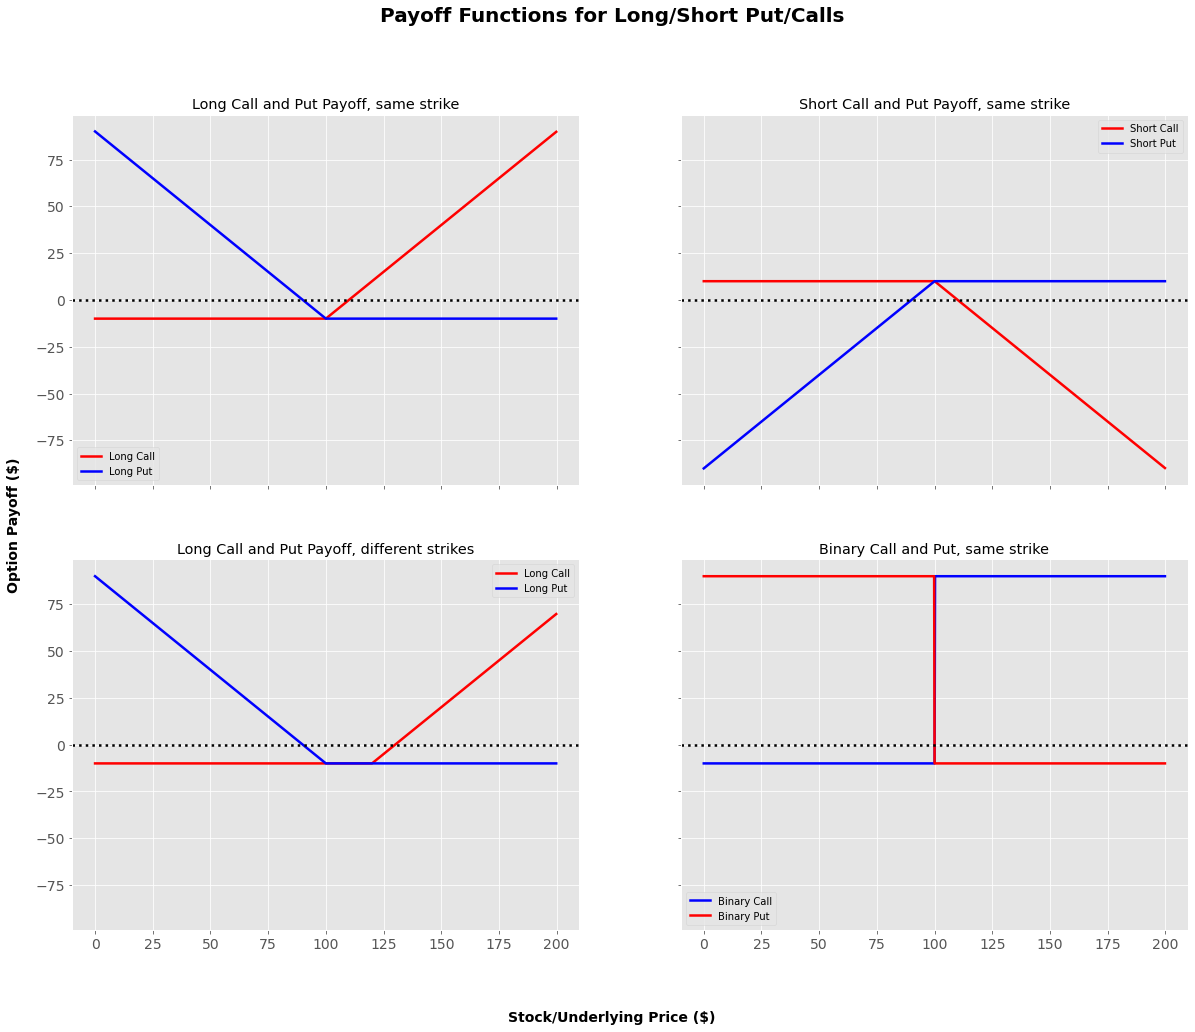

In [2]:
S = [t/5 for t in range(0,1000)] # Define some series of stock-prices 
Price = 10
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize = (20,15))
fig.suptitle('Payoff Functions for Long/Short Put/Calls', fontsize=20, fontweight='bold')
fig.text(0.5, 0.04, 'Stock/Underlying Price ($)', ha='center', fontsize=14, fontweight='bold')
fig.text(0.08, 0.5, 'Option Payoff ($)', va='center', rotation='vertical', fontsize=14, fontweight='bold')

lc_P = o.long_call(S,100, Price)
lp_P = o.long_put(S,100, Price)
plt.subplot(221)
plt.plot(S, lc_P, 'r')
plt.plot(S, lp_P, 'b')
plt.legend(["Long Call", "Long Put"])
plt.axhline(y=0, linestyle="dotted", color="black")
ax[0][0].set_title('Long Call and Put Payoff, same strike')

sc_P = o.short_call(S,100, Price)
sp_P = o.short_put(S,100, Price)
plt.subplot(222)
plt.plot(S, sc_P, 'r')
plt.plot(S, sp_P, 'b')
plt.legend(["Short Call", "Short Put"])
plt.axhline(y=0, linestyle="dotted", color="black")
ax[0][1].set_title('Short Call and Put Payoff, same strike')

lc_120 = o.long_call(S, 120, Price)
lp_100 = o.long_put(S,100, Price)
plt.subplot(223)
plt.plot(S, lc_120, 'r')
plt.plot(S, lp_100, 'b')
plt.legend(["Long Call", "Long Put"])
plt.axhline(y=0, linestyle="dotted", color="black")
ax[1][0].set_title('Long Call and Put Payoff, different strikes')

bc_P = o.binary_call(S,100, Price)
bp_P = o.binary_put(S,100, Price) 
plt.subplot(224)
plt.plot(S, bc_P, 'b')
plt.plot(S, bp_P, 'r')
plt.legend(["Binary Call", "Binary Put"])
plt.axhline(y=0, linestyle="dotted", color="black")
ax[1][1].set_title('Binary Call and Put, same strike')

plt.show()

## More Complicated Strategies

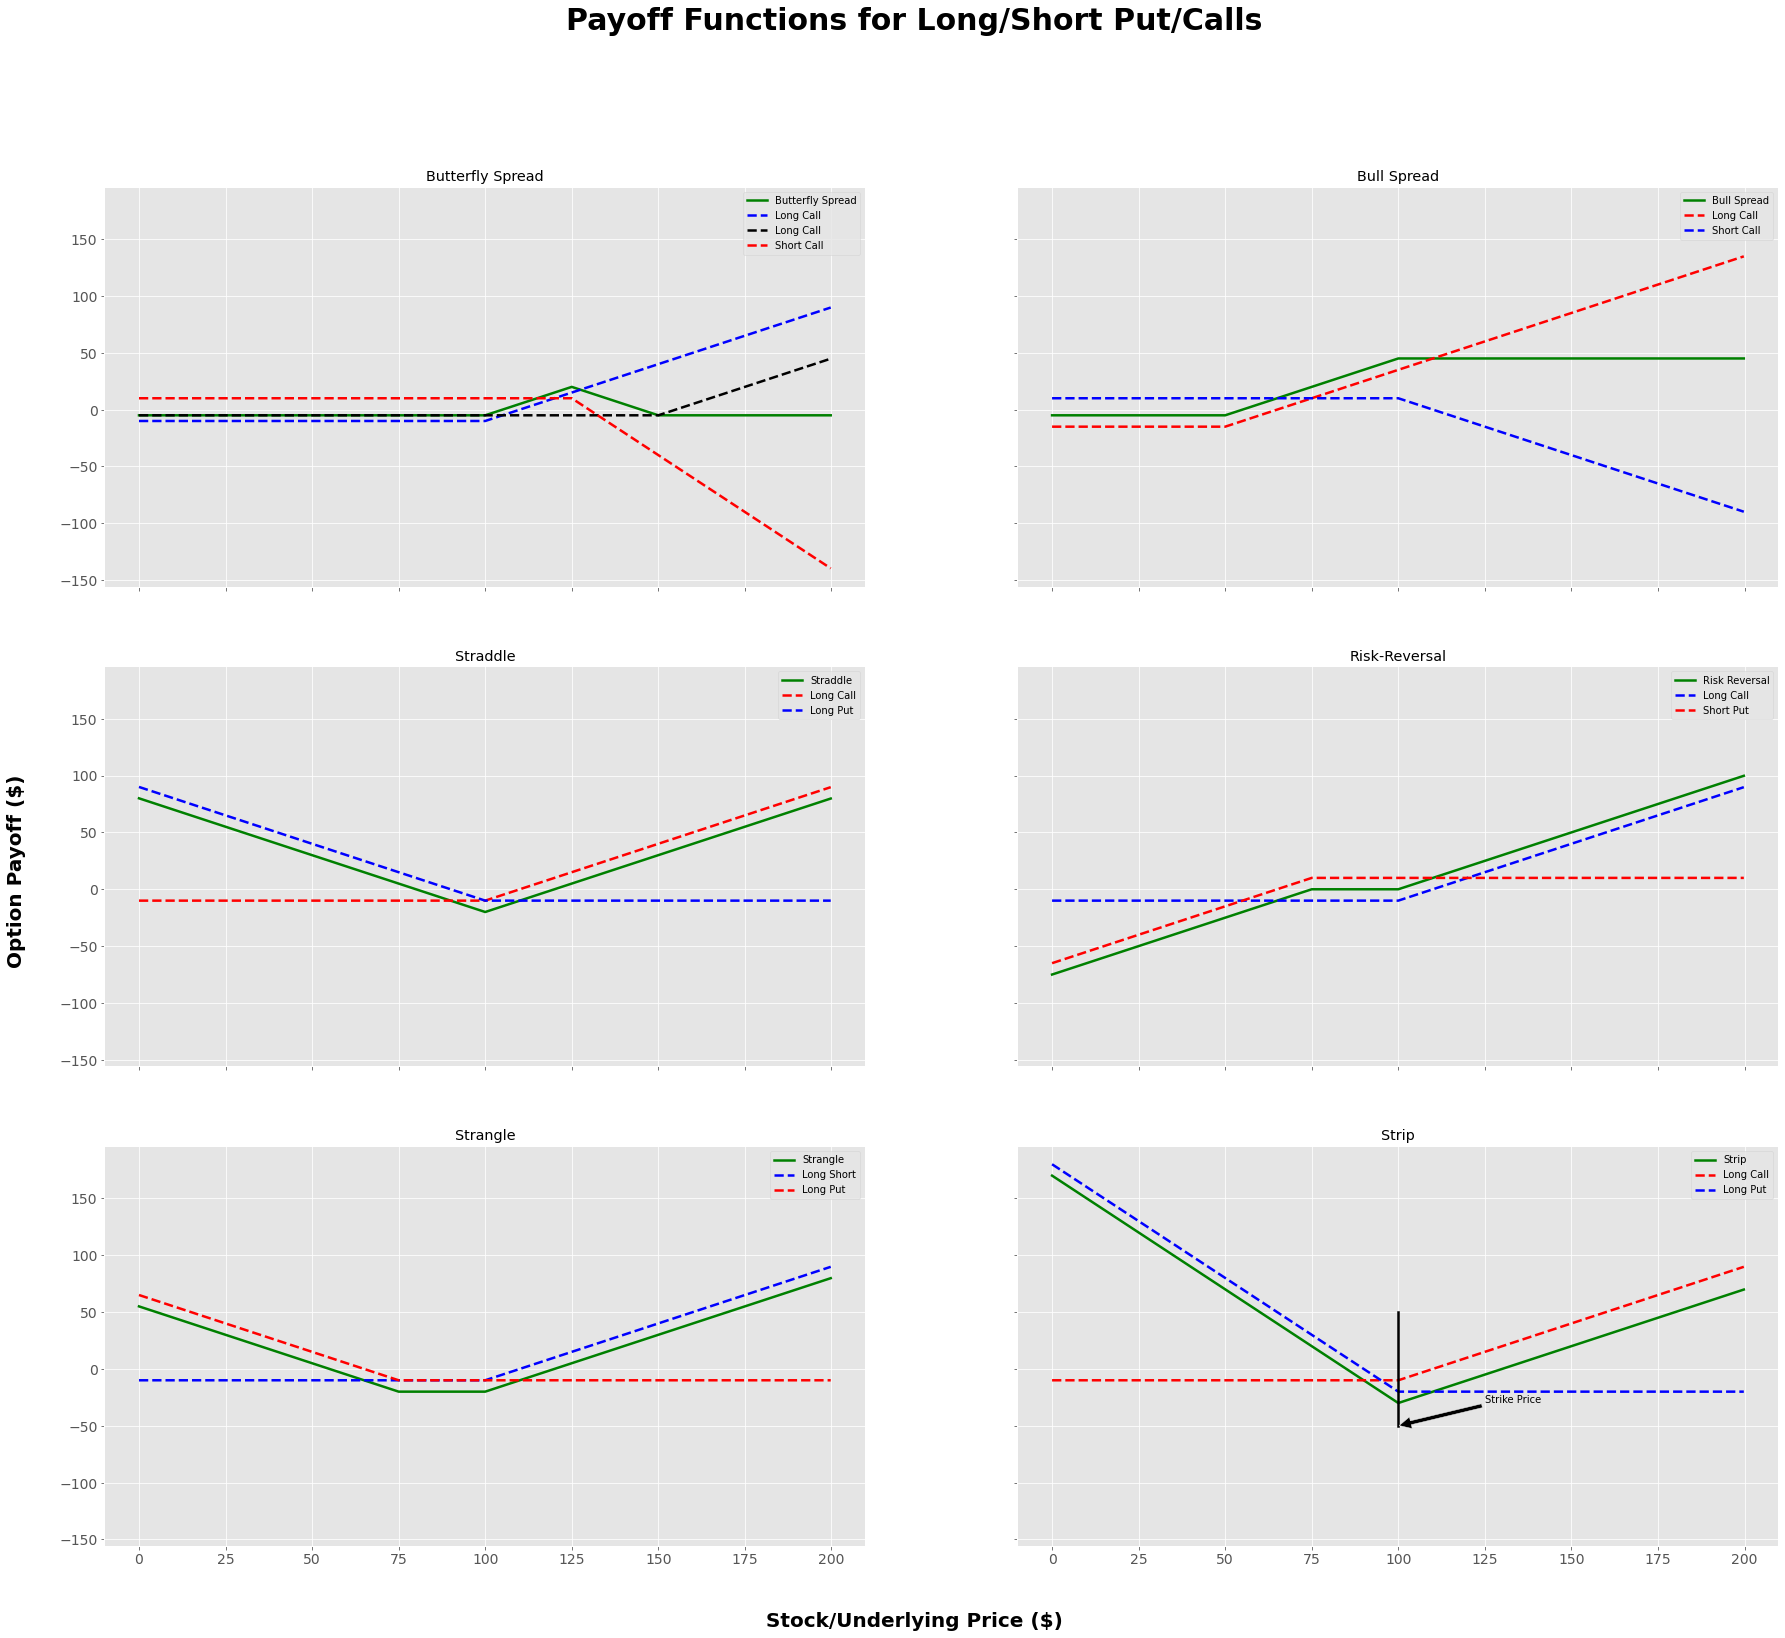

In [3]:
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(30, 25))
fig.suptitle('Payoff Functions for Long/Short Put/Calls', fontsize=30, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=20, fontweight='bold')
fig.text(0.08, 0.5, 'Option Payoff ($)', va='center', rotation='vertical', fontsize=20, fontweight='bold')

plt.subplot(321)
P = o.butterfly_spread(S, 100, 125, 150, 10, 5, 5)
P_1 = o.long_call(S, 100, 10)
P_2 = o.long_call(S, 150, 5)
P_3 = o.short_call(S, 125, 5)
P_3 =[2*p for p in P_3]
plt.plot(S, P, "g")
plt.plot(S, P_1, 'b--')
plt.plot(S, P_2, 'k--')
plt.plot(S, P_3, 'r--')
plt.legend(["Butterfly Spread", "Long Call", "Long Call", "Short Call"], prop={"size":20})
plt.title("Butterfly Spread")

plt.subplot(322)
P1 = o.bull_spread(S,50, 100, 15, 10)
long_c = o.long_call(S, 50, 15)
short_c = o.short_call(S, 100, 10)
    
plt.plot(S, P1, 'g')
plt.plot(S, long_c, 'r--')
plt.plot(S, short_c, 'b--')

plt.legend(["Bull Spread", "Long Call", "Short Call"], prop={"size":20})
plt.title("Bull Spread")

plt.subplot(323)
P = o.straddle(S,100, 10, 10)
P_longcall = o.long_call(S, 100, 10)
P_longput = o.long_put(S, 100, 10)
plt.plot(S, P, "g") 
plt.plot(S, P_longcall, 'r--')
plt.plot(S, P_longput, 'b--')
plt.legend(["Straddle", "Long Call", "Long Put"], prop={"size":20})
plt.title("Straddle")

plt.subplot(324)
P = o.risk_reversal(S,100,75, 10, 10)
P_longcall = o.long_call(S, 100, 10)
P_shortput = o.short_put(S,75, 10)
plt.plot(S, P, "g")
plt.plot(S, P_longcall, 'b--')
plt.plot(S, P_shortput, 'r--')
plt.legend(["Risk Reversal", "Long Call", "Short Put"], prop={"size":20})
plt.title("Risk-Reversal")

plt.subplot(325)
P = o.strangle(S,100, 75, 10, 10)
P_longcall = o.long_call(S, 100, 10)
P_longput = o.long_put(S, 75, 10)
plt.plot(S, P, 'g')
plt.plot(S, P_longcall, 'b--')
plt.plot(S, P_longput, 'r--')
plt.legend(["Strangle", "Long Short", "Long Put"], prop={"size":20})
plt.title("Strangle")

plt.subplot(326)
P_1 = o.long_call(S, 100, 10)
P_2 = o.long_put(S, 100, 10)
P_2 = [2*p for p in P_2]
P = o.strip(S, 100, 10, 10 )
plt.plot(S, P, 'g')
plt.plot(S, P_1, 'r--')
plt.plot(S, P_2, 'b--')
plt.plot([100,100],[-50,50],'black')
plt.legend(["Strip", "Long Call", "Long Put"], prop={"size":20})
plt.annotate('Strike Price', 
            xy=(100, -50), 
            xytext=(125, -30), 
            arrowprops = dict(facecolor='black', shrink=0.01))
plt.title("Strip")

plt.show()

## The Greeks

See how the option prices vary with stock price. 

d:\github\website\notebooks\options.py:107: RuntimeWarning: divide by zero encountered in log
  return (np.log(S/K) + (r + 0.5 * vol**2)*(T-t))/(vol*np.sqrt(T-t))


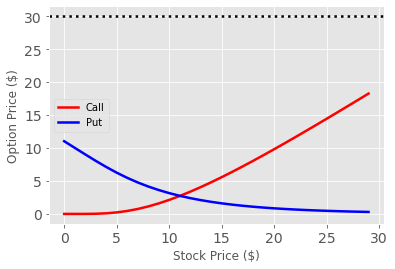

In [4]:
# TO DO: This does not look correct to me. 
import numpy as np
Strike = 30
r = 0.10
vol = 0.2
T = 10
S = np.arange(0, 30)
vals_call = [o.BS_call(x, Strike, r, vol, T, 0) for x in S]
vals_put = [o.BS_put(x, Strike, r, vol, T, 0) for x in S]
plt.plot(S,vals_call, 'r', label = "Call")
plt.plot(S, vals_put, 'b', label  = "Put")
plt.legend()
plt.ylabel("Option Price ($)")
plt.xlabel("Stock Price ($)")
plt.axhline(y=Strike, linestyle="dotted", color="black")
plt.show()

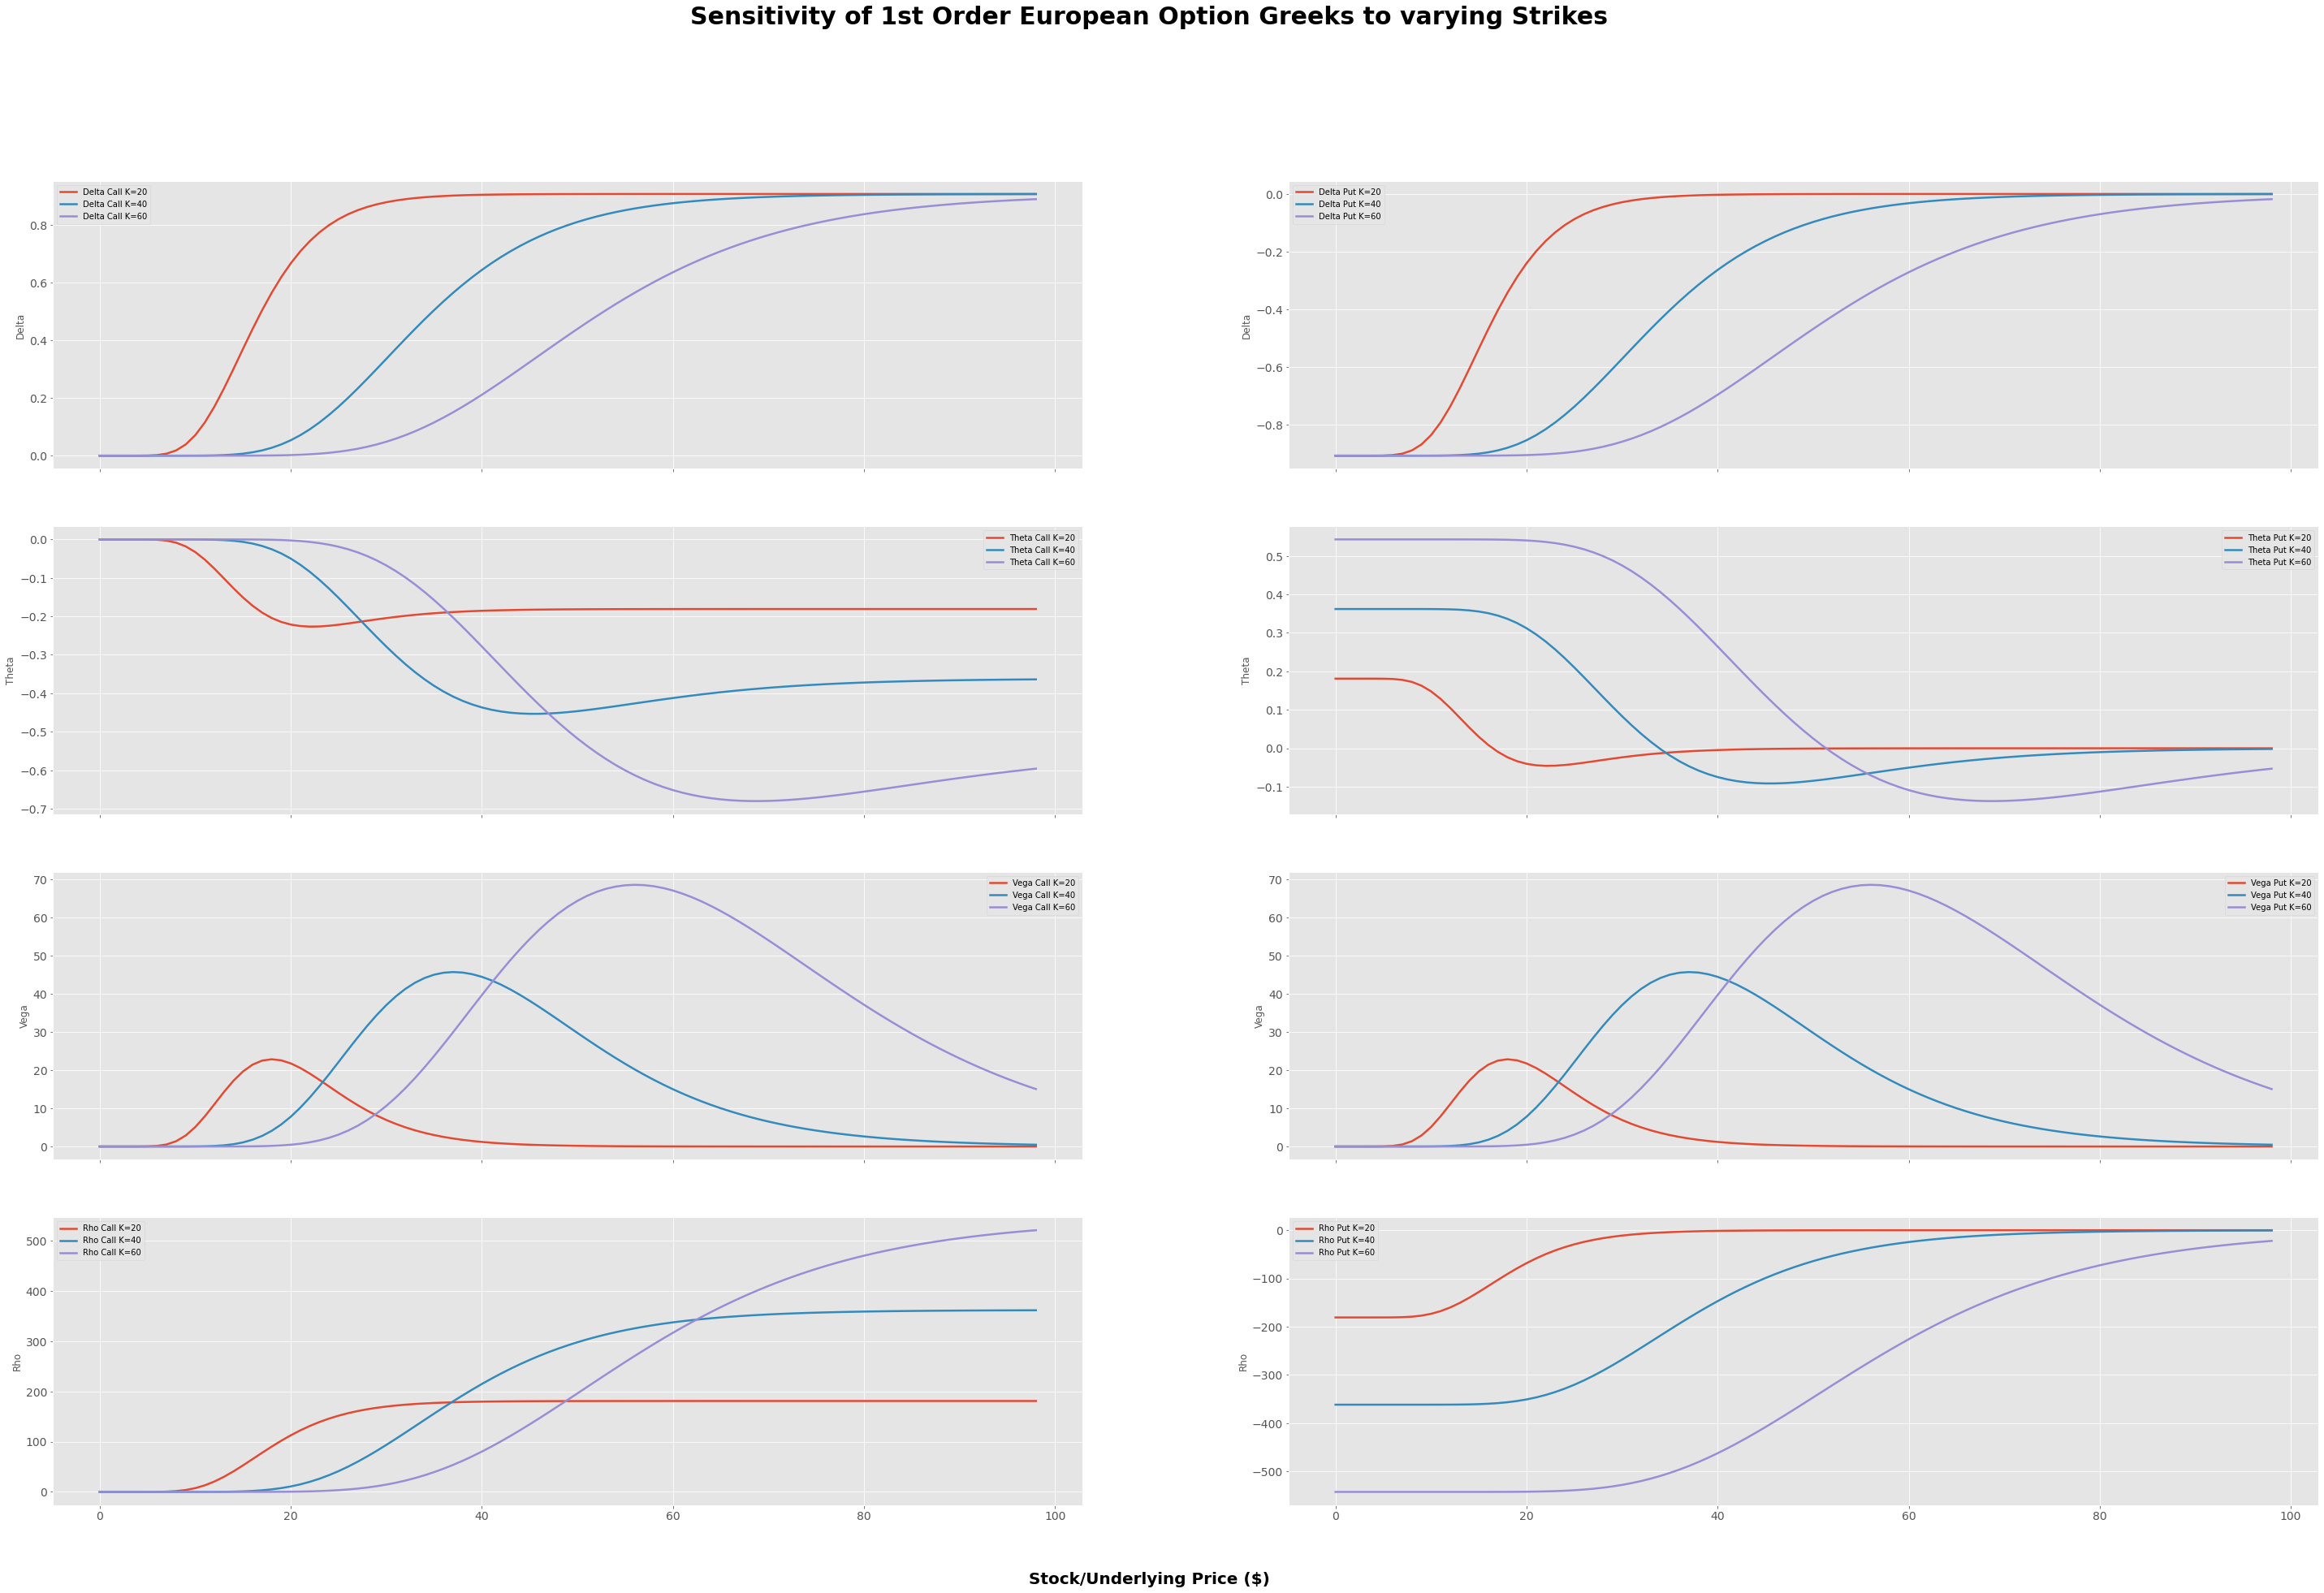

In [5]:
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=False, figsize=(50, 30))
fig.suptitle('Sensitivity of 1st Order European Option Greeks to varying Strikes', fontsize=30, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=20, fontweight='bold')
vals = [20,40,60]

r = 0.01
vol = 0.1
T = 10
t = 0
plt.subplot(421)
for i in vals:
    tmp_c = [o.delta(s, i, r, vol, T, t, "call")*20000 for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Delta Call K=%i" % i ))
plt.ylabel("Delta")
plt.legend(prop={"size":20})

plt.subplot(422)
for i in vals:
    tmp_p = [o.delta(s, i, r, vol, T, t, "put")*20000 for s in np.arange(1,100)]
    plt.plot(tmp_p, label = ("Delta Put K=%i" % i ))
plt.ylabel("Delta")
plt.legend(prop={"size":20})

plt.subplot(423)
for i in vals:
    tmp_c = [o.theta(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Theta Call K=%i" % i ))
plt.ylabel("Theta")
plt.legend(prop={"size":20})

plt.subplot(424)
for i in vals:
    tmp_p = [o.theta(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_p, label = ("Theta Put K=%i" % i ))
plt.ylabel("Theta")
plt.legend(prop={"size":20})

plt.subplot(425)
for i in vals:
    tmp_c = [o.vega(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Vega Call K=%i" % i ))
plt.ylabel("Vega")
plt.legend(prop={"size":20})

plt.subplot(426)
for i in vals:
    tmp_p = [o.vega(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_p, label = ("Vega Put K=%i" % i ))
plt.ylabel("Vega")
plt.legend(prop={"size":20})

plt.subplot(427)
for i in vals:
    tmp_c = [o.rho(s, i, r, vol, T, t, "call") for s in np.arange(1,100)]
    plt.plot(tmp_c, label = ("Rho Call K=%i" % i ))
plt.ylabel("Rho")
plt.legend(prop={"size":20})

plt.subplot(428)
for i in vals:
    tmp_p = [o.rho(s, i, r, vol, T, t, "put") for s in np.arange(1,100)]
    plt.plot(tmp_p, label = ("Rho Put K=%i" % i ))
plt.ylabel("Rho")
plt.legend(prop={"size":20})
plt.show()

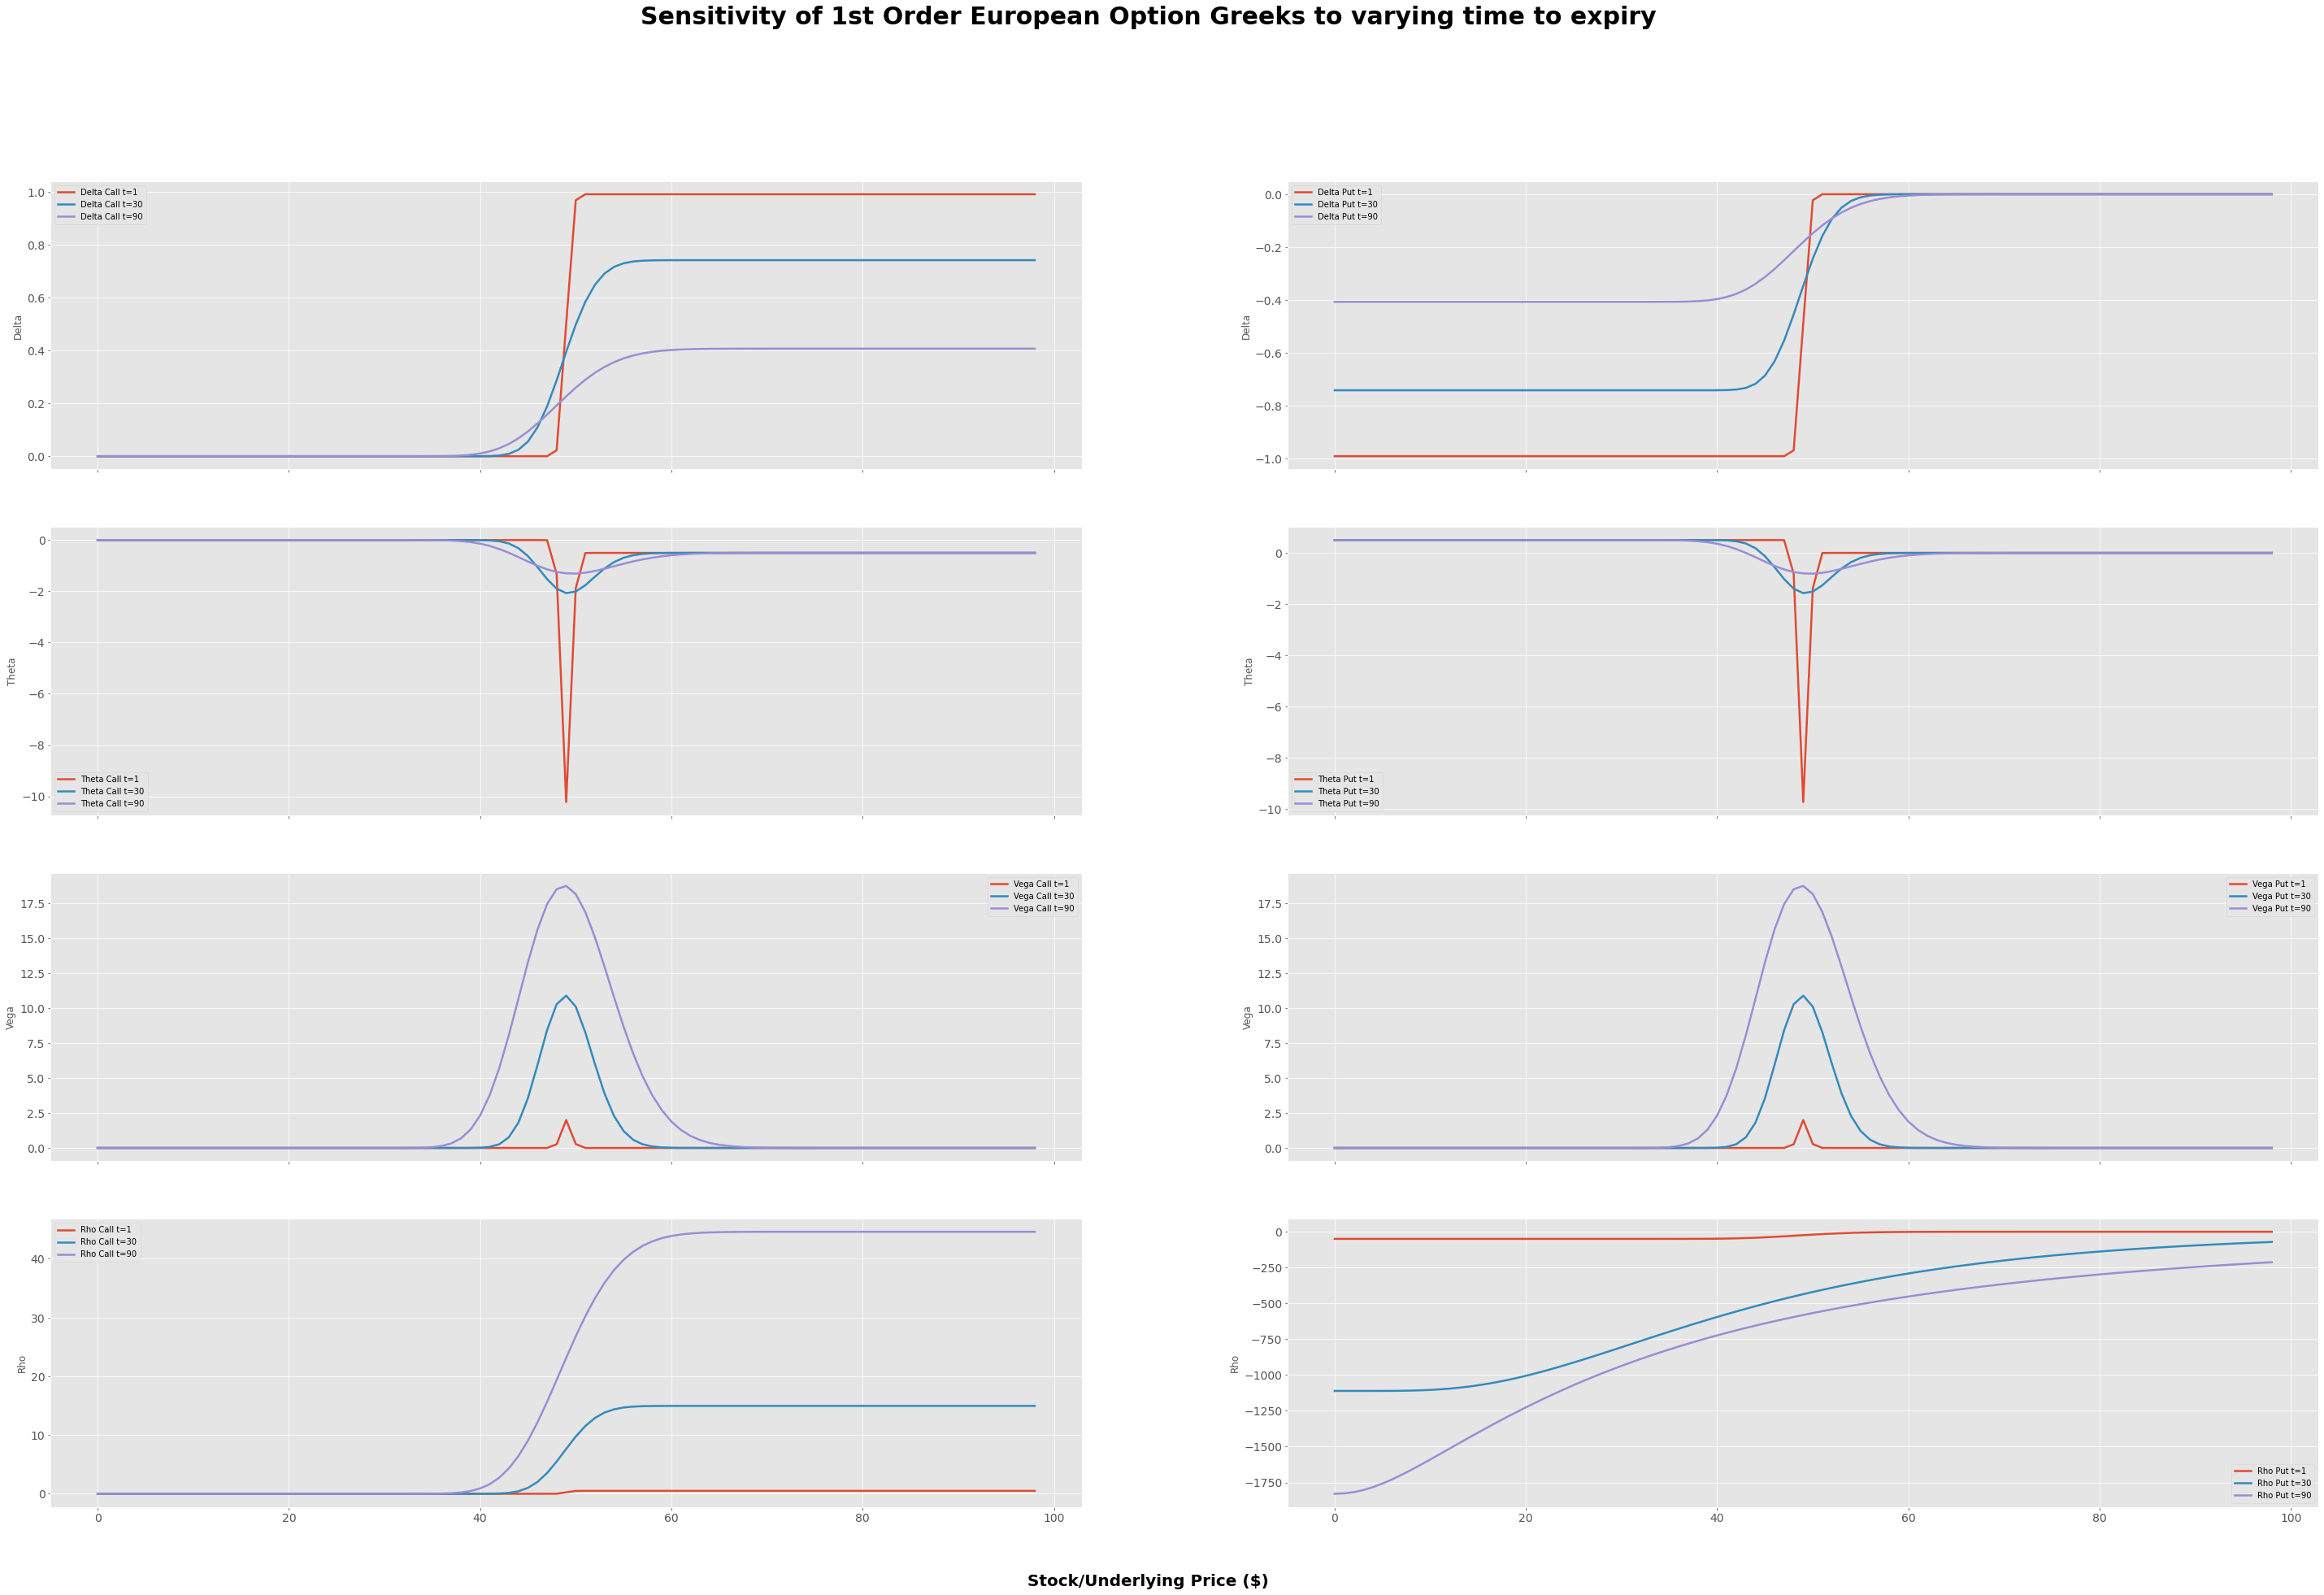

In [6]:
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=False, figsize=(50, 30))
fig.suptitle('Sensitivity of 1st Order European Option Greeks to varying time to expiry', fontsize=30, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=20, fontweight='bold')
vals = [1, 30, 90]
range_val = 100

Strike = 50
r = 0.01
vol = 0.1
t = 0
plt.subplot(421)
for i in vals:
    tmp_c = [o.delta(s, Strike, r, vol, i/range_val, t, "call") for s in np.arange(1,range_val)]
    plt.plot(tmp_c, label = ("Delta Call t=%i" % i ))
plt.ylabel("Delta")
plt.legend(prop={"size":20})

plt.subplot(422)
for i in vals:
    tmp_p = [o.delta(s, Strike, r, vol, i/range_val, t, "put") for s in np.arange(1,range_val)]
    plt.plot(tmp_p, label = ("Delta Put t=%i" % i ))
plt.ylabel("Delta")
plt.legend(prop={"size":20})

plt.subplot(423)
for i in vals:
    tmp_c = [o.theta(s, Strike, r, vol, i/range_val, t, "call") for s in np.arange(1,range_val)]
    plt.plot(tmp_c, label = ("Theta Call t=%i" % i ))
plt.ylabel("Theta")
plt.legend(prop={"size":20})

plt.subplot(424)
for i in vals:
    tmp_p = [o.theta(s, Strike, r, vol, i/range_val, t, "put") for s in np.arange(1,range_val)]
    plt.plot(tmp_p, label = ("Theta Put t=%i" % i ))
plt.ylabel("Theta")
plt.legend(prop={"size":20})

plt.subplot(425)
for i in vals:
    tmp_c = [o.vega(s, Strike, r, vol, i/range_val, t, "call") for s in np.arange(1,range_val)]
    plt.plot(tmp_c, label = ("Vega Call t=%i" % i ))
plt.ylabel("Vega")
plt.legend(prop={"size":20})

plt.subplot(426)
for i in vals:
    tmp_p = [o.vega(s, Strike, r, vol, i/range_val, t, "put") for s in np.arange(1,range_val)]
    plt.plot(tmp_p, label = ("Vega Put t=%i" % i ))
plt.ylabel("Vega")
plt.legend(prop={"size":20})

plt.subplot(427)
for i in vals:
    tmp_c = [o.rho(s, Strike, r, vol, i/range_val, t, "call") for s in np.arange(1,range_val)]
    plt.plot(tmp_c, label = ("Rho Call t=%i" % i ))
plt.ylabel("Rho")
plt.legend(prop={"size":20})

plt.subplot(428)
for i in vals:
    tmp_p = [o.rho(s, Strike, r, vol, i, t, "put") for s in np.arange(1,range_val)]
    plt.plot(tmp_p, label = ("Rho Put t=%i" % i ))
plt.ylabel("Rho")
plt.legend(prop={"size":20})
plt.show()

## Second order derivatives

Gamma and Charm (partial to delta) are the most widely used. Note how gamma and charm for call and puts are the same at the corresponding strikes. See [this note](https://www.worthpointeinvest.com/ask-the-chief-why-is-gamma-the-same-for-call-and-put-options/#:~:text=The%20truth%20is%2C%20all%20calls,expiration%20have%20the%20same%20Gamma%3F%E2%80%9D) for more information

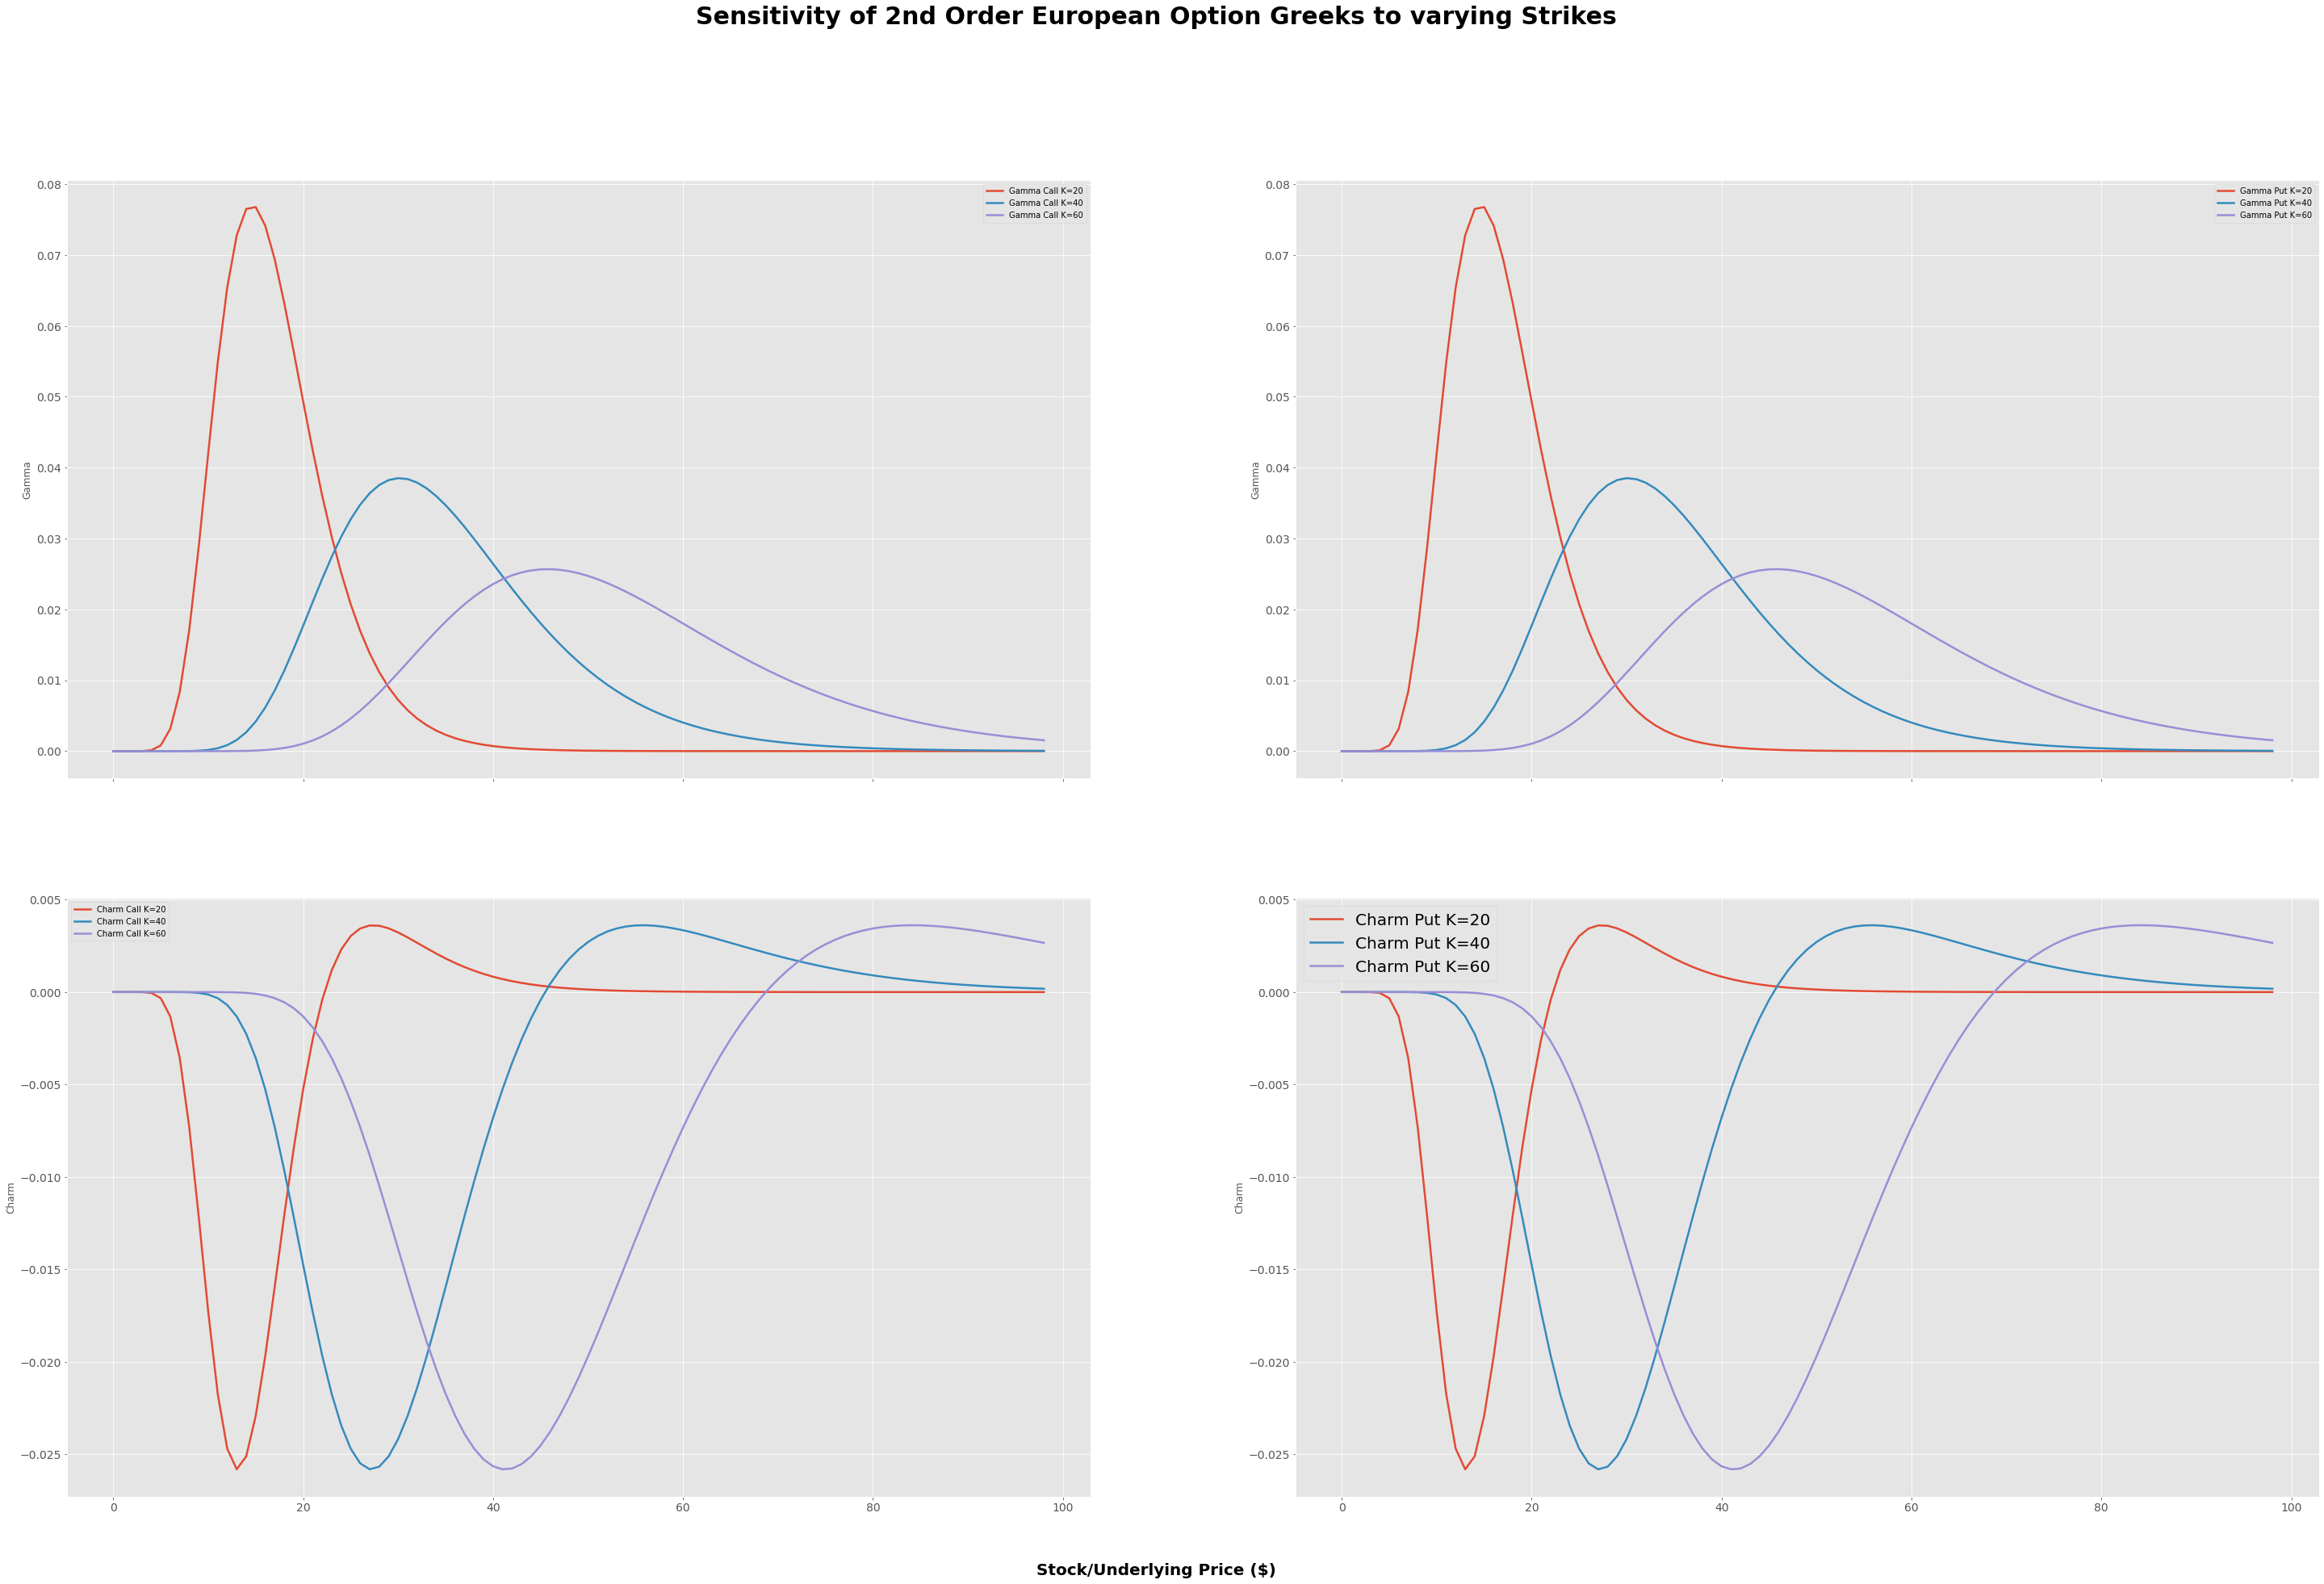

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=(50, 30))
fig.suptitle('Sensitivity of 2nd Order European Option Greeks to varying Strikes', fontsize=30, fontweight='bold')
fig.text(0.5, 0.08, 'Stock/Underlying Price ($)', ha='center', fontsize=20, fontweight='bold')
vals = [20,40,60]
range_val = 100

r = 0.01
vol = 0.1
T = 10
t = 0
plt.subplot(221)
for i in vals:
    tmp_c = [o.gamma(s, i, r, vol, T, t, "call") for s in np.arange(1,range_val)]
    plt.plot(tmp_c, label = ("Gamma Call K=%i" % i ))
plt.ylabel("Gamma")
plt.legend(prop={"size":20})

plt.subplot(222)
for i in vals:
    tmp_p = [o.gamma(s, i, r, vol, T, t, "put") for s in np.arange(1,range_val)]
    plt.plot(tmp_p, label = ("Gamma Put K=%i" % i ))
plt.ylabel("Gamma")
plt.legend(prop={"size":20})

plt.subplot(223)
for i in vals:
    tmp_c = [o.charm(s, i, r, vol, T, t, "call") for s in np.arange(1,range_val)]
    plt.plot(tmp_c, label = ("Charm Call K=%i" % i ))
plt.ylabel("Charm")
plt.legend(prop={"size":20})

plt.subplot(224)
for i in vals:
    tmp_p = [o.charm(s, i, r, vol, T, t, "put") for s in np.arange(1,range_val)]
    plt.plot(tmp_p, label = ("Charm Put K=%i" % i ))
plt.ylabel("Charm")
plt.legend(prop={"size":20})
plt.show()

# Surfaces

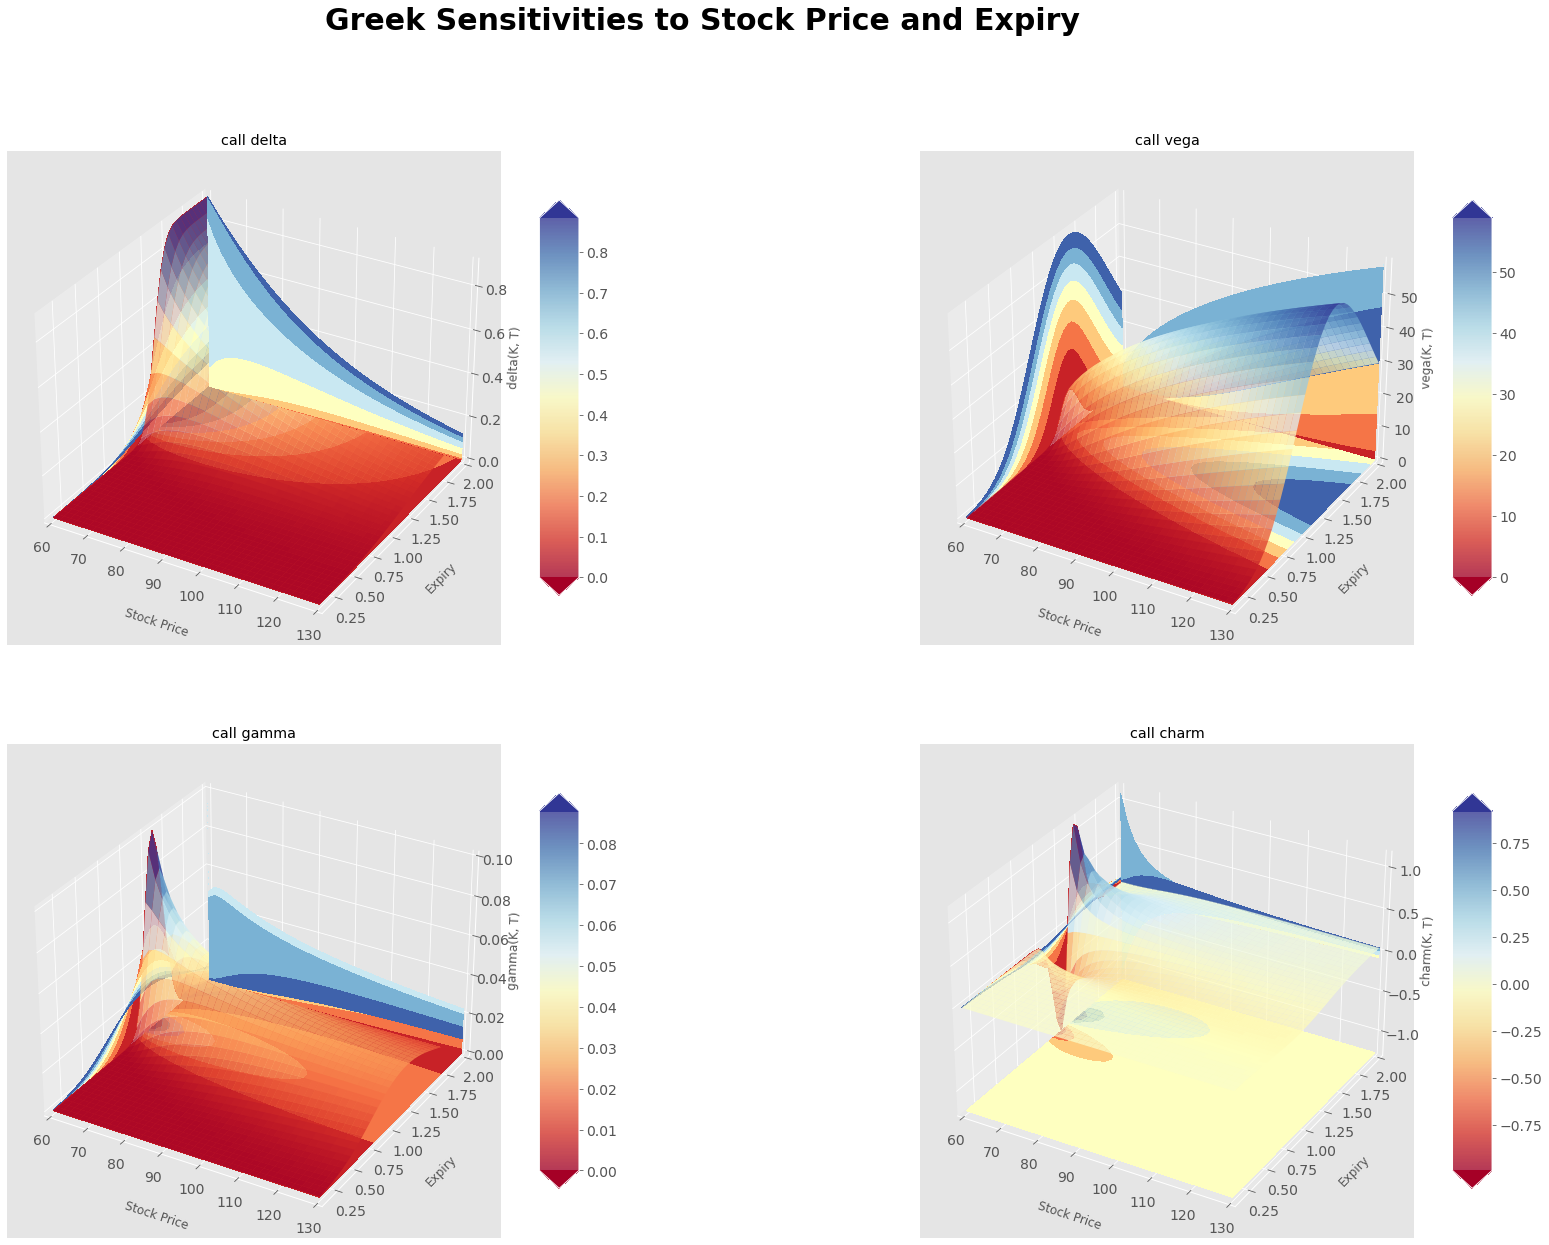

In [8]:
S = np.linspace(60, 130, 40)
K = np.linspace(105.0, 105.0, 40)
T = np.linspace(0.1, 2.0, 40)
t = np.linspace(0.0, 0.0, 40)
r = np.linspace(0.0, 0.0, 40)
vol = np.linspace(0.12, 0.12, 40)

x, y  = np.meshgrid(S, T)

fig = plt.figure(figsize=(30,20))
fig.suptitle("Greek Sensitivities to Stock Price and Expiry",fontsize=30, fontweight='bold')
greeks = [o.delta, o.vega, o.gamma, o.charm]

for i in range(len(greeks)):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    o.greeks_plot_tool(greeks[i],"Stock Price", "Expiry", S, K, r, vol, T, t, x, y, "call", ax)

plt.show()